In [6]:
# importando o tensorflow e o keras
import tensorflow
from tensorflow import keras

In [7]:
# Acessar dataset disponivel dentro do keras
# O dataset contem 70 mil imagens, portanto 60 mil é de treino e 10 mil é de teste
dataset = keras.datasets.fashion_mnist

In [8]:
# Carregar o dataset
# Ao carregar o DataSet, o retorno é duas tuplas, onde a primeira contem imagens e identificações de treino (x,y)
# e o segundo contem imagens e identificações de teste (x,y)
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

In [10]:
# Podemos analisar a dimensão do nosso array com o shape
# Formato do array
# Temos 60000 registro de array de 28 linhas 28 coluna
imagens_treino.shape

(60000, 28, 28)

In [15]:
# Temos 10000 registro de array de 28 linhas 28 coluna
# Imagens de treino
imagens_teste.shape

(10000, 28, 28)

In [20]:
print('Labels de treino: ', len(identificacoes_treino),'Labels de Teste: ', len(identificacoes_teste))

Labels de treino:  60000 Labens de Teste:  10000


In [21]:
# Importando o matplotlib para plotar as imagens
import matplotlib.pyplot as plt

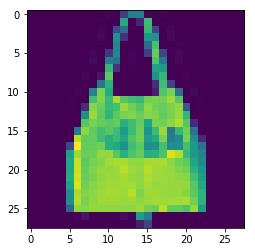

In [23]:
# Platando a primeira imagem de index[0]
plt.imshow(imagens_treino[0])